## Heart-Disease Predictor 

##### Tutor project link : https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-3-structured-data-projects/end-to-end-heart-disease-classification.ipynb

### Data:
#### Data link : 
    age - age in years
    sex - (1 = male; 0 = female)
    cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
    trestbps - resting blood pressure (in mm Hg on admission to the hospital)
        anything above 130-140 is typically cause for concern
    chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern
    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes
    restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
        can range from mild symptoms to severe problems
        signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
        Enlarged heart's main pumping chamber
    thalach - maximum heart rate achieved
    exang - exercise induced angina (1 = yes; 0 = no)
    oldpeak - ST depression induced by exercise relative to rest
        looks at stress of heart during excercise
        unhealthy heart will stress more
    slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
    ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
    thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
    target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Tool set

In [37]:
#Ploting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import RocCurveDisplay

# Print last Update 
import time
print(f"Last Update : {time.asctime()}")

Last Update : Mon Sep 23 19:14:24 2024


In [38]:
data = pd.read_csv("Data/heart-disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [39]:
# to check the quality of data set, first should check the counts of each results
# if the counts have significant differenet, it is not suitable.

data.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

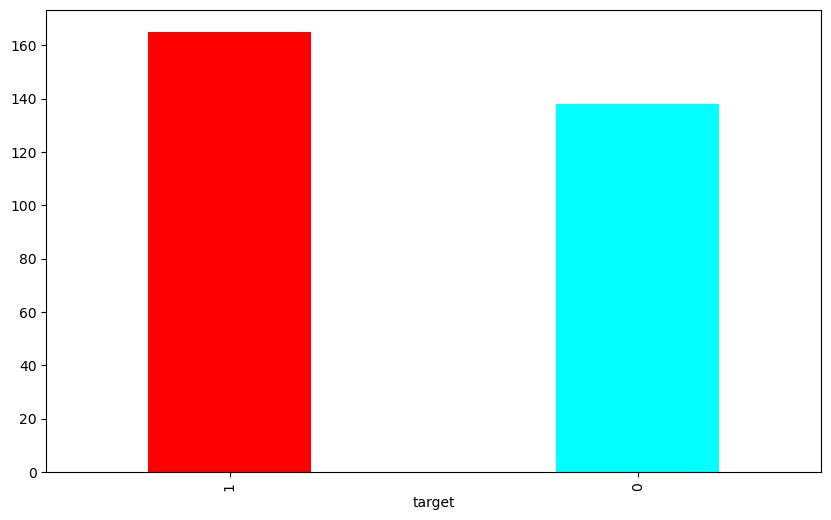

In [40]:
data.target.value_counts().plot(kind="bar",
                                color=["red", "cyan"],
                                figsize=(10,6),
                                width=0.4);
plt.show()

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [42]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Heart Disease Frequency according to Gender

In [43]:
data.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [44]:
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,24,114
1,72,93


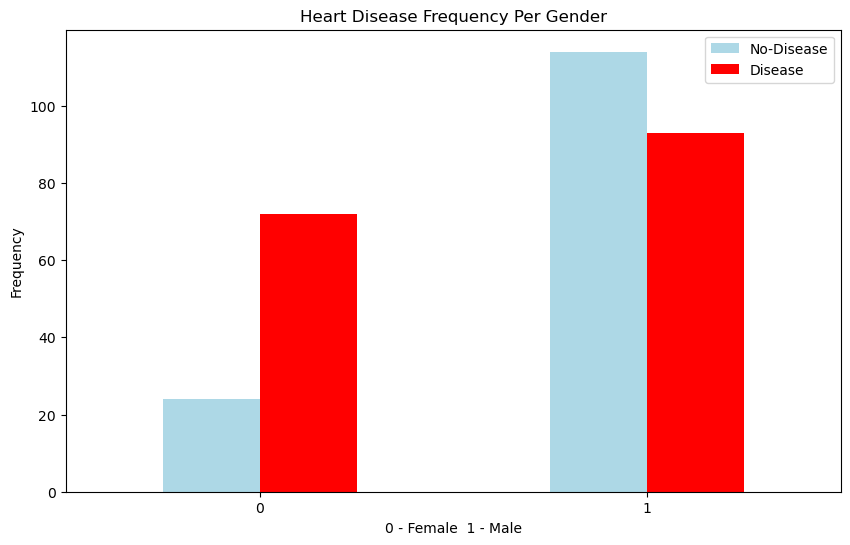

In [45]:
pd.crosstab(data.sex, data.target).plot(kind="bar",
                                        color=["lightblue","red"],
                                        figsize=(10,6))
plt.legend(["No-Disease", "Disease"])
plt.title("Heart Disease Frequency Per Gender")
plt.xlabel("0 - Female  1 - Male")
plt.ylabel("Frequency")
plt.xticks(rotation = 0)
plt.show()

#### Age vs Max Heart rate for Heart Disease

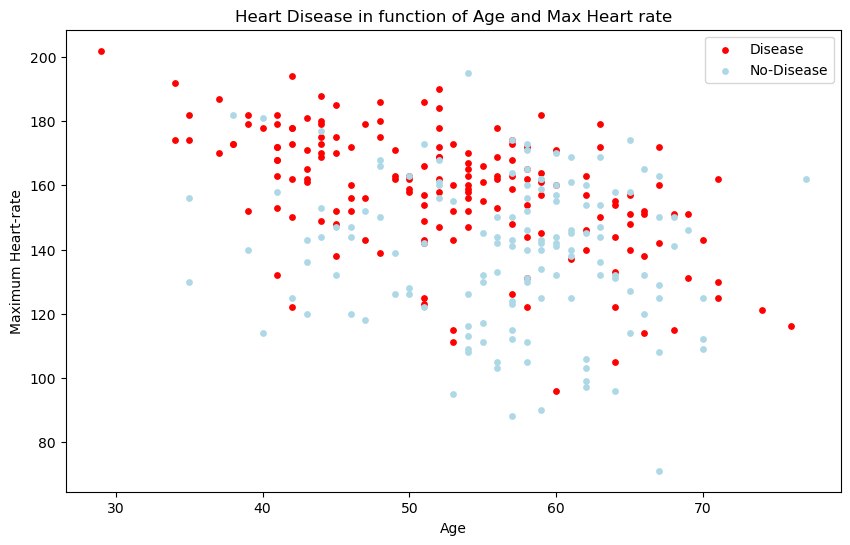

In [46]:
plt.figure(figsize = (10,6));

plt.scatter(data.age[data.target==1], data.thalach[data.target==1], c="red", s=15);

plt.scatter(data.age[data.target==0], data.thalach[data.target==0], c="lightblue", s=15);

plt.title("Heart Disease in function of Age and Max Heart rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart-rate")
plt.legend(["Disease", "No-Disease"])
plt.show()

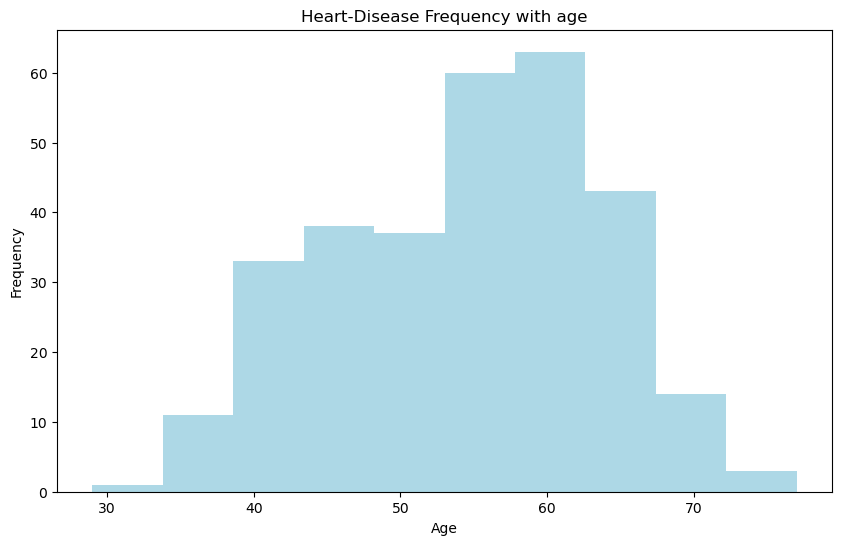

In [47]:
data.age.plot.hist(color = "lightblue", figsize = (10,6));

plt.title("Heart-Disease Frequency with age")
plt.xlabel("Age")
plt.show()

#### Heart Disease Frequency per Chest Pain Type

cp - chest pain type

        0: Typical angina: 
        1: Atypical angina:
        2: Non-anginal pain:
        3: Asymptomatic:

In [48]:
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


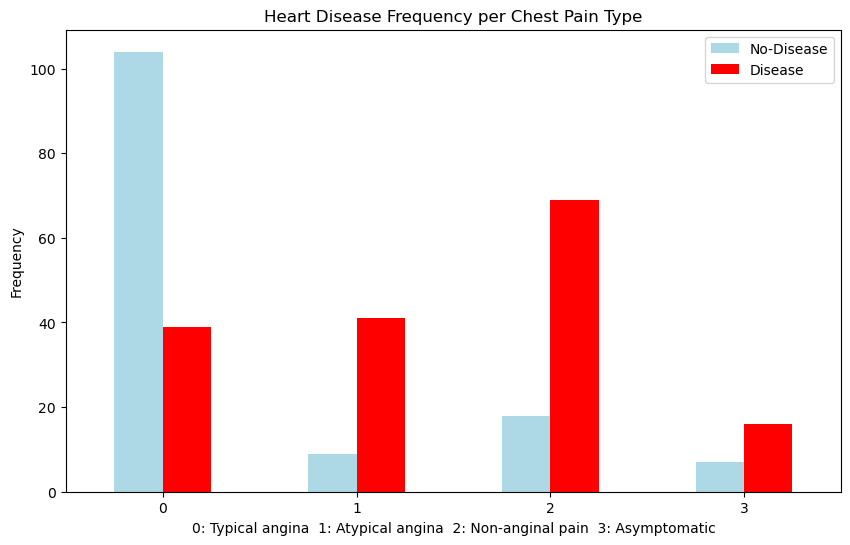

In [49]:
pd.crosstab(data.cp, data.target).plot(kind="bar",
                                      figsize=(10,6),
                                      color=("lightblue","red"))

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("0: Typical angina  1: Atypical angina  2: Non-anginal pain  3: Asymptomatic")
plt.xticks(rotation=0)
plt.ylabel("Frequency")
plt.legend(["No-Disease", "Disease"])
plt.show()

#### Correlations

In [50]:
corr_matrix = data.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


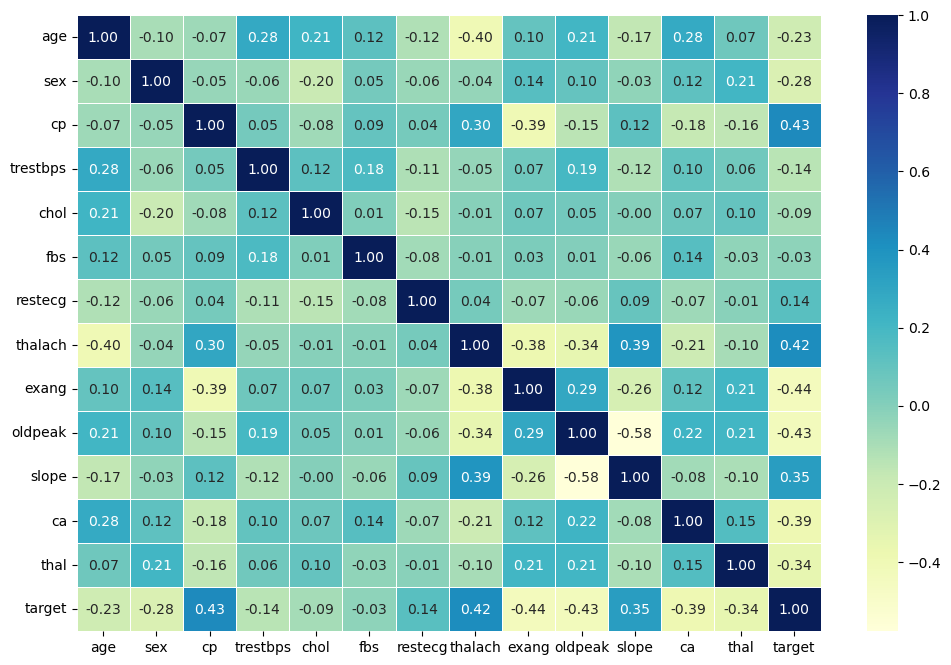

In [51]:
plt.figure(figsize=(12,8));

sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt=".2f",
           cmap="YlGnBu");

plt.show()

### Modeling

In [52]:
x = data.drop("target", axis=1)
y = data.target.values

In [53]:
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [54]:
# put a model in a dictionary and get the score as a dictionary using a function
models = { "Logistic Regression" : LogisticRegression(),
          "Random Forest" : RandomForestClassifier(),
          "KN Classifier" : KNeighborsClassifier()}

# Function
def fit_and_get_score(models, x_train, x_test, y_train, y_test):
    """
    This function will return the score dictionary of given models dictionary

    Input: 
    (models_dictionary, X_train data, X_test data, Y_train data, Y_test data)
    
    """
    np.random.seed(42)
    model_score ={}

    for name, model in models.items():
        model.fit(x_train, y_train)
        model_score[name] = model.score(x_test, y_test)

    return model_score
    

In [55]:
model_score = fit_and_get_score(models=models,
                               x_train=x_train,
                               x_test=x_test,
                               y_train=y_train,
                               y_test=y_test)

model_score

C:\Users\sulit\miniconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918,
 'KN Classifier': 0.6885245901639344}

In [56]:
# Model comparison 
model_compare = pd.DataFrame(model_score, index=["Accuracy"])
model_compare

,Logistic Regression,Random Forest,KN Classifier
Accuracy,0.885246,0.836066,0.688525


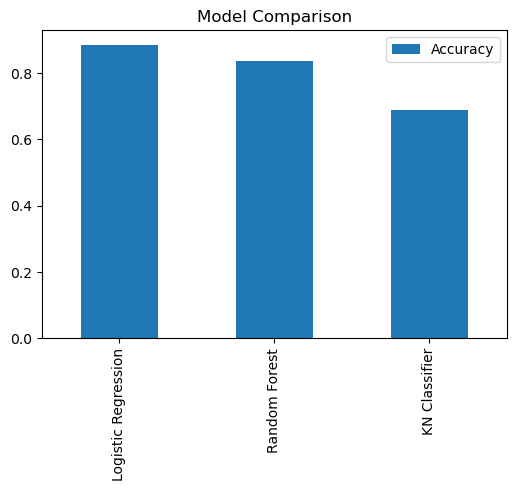

In [57]:
model_compare.T.plot.bar(figsize=(6,4));
plt.title("Model Comparison")
plt.show()

#### Logistic Regression model is seems like a best accurate model to predict the Hear disease, but we expected the acuracy level 95% minimum

Let's Tune the models so..

1. By hands
2. By RandomizedSearchCV
3. By GridSearchCV

In [58]:
# KNN Tuning by hand
np.random.seed(42)

train_score = []
test_score = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:

    knn.set_params(n_neighbors = i)
    knn.fit(x_train, y_train)

    train_score.append(knn.score(x_train, y_train))
    test_score.append(knn.score(x_test, y_test))


In [59]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

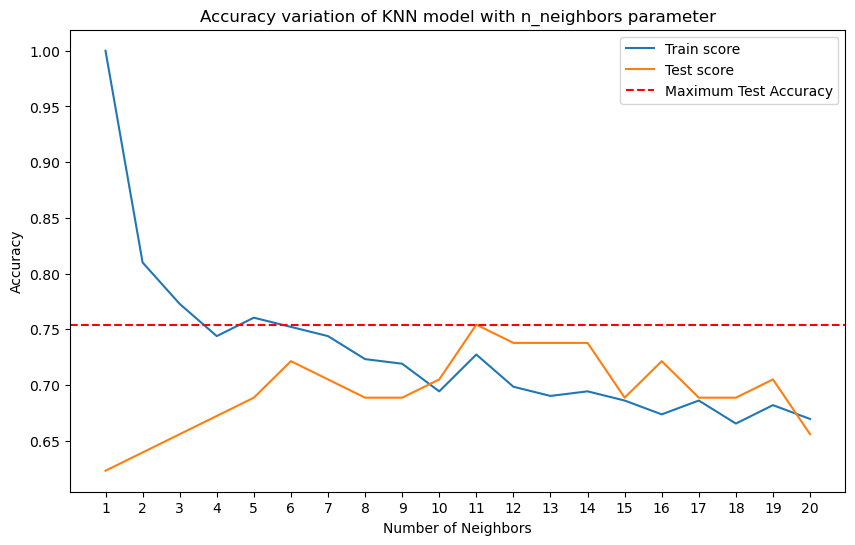

Maximum Test Accuracy of KNN model on the test data : 75.41%


In [60]:
plt.figure(figsize=(10,6));

plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")

plt.axhline(y= max(test_score), color = 'r', linestyle='--', label="Maximum Test Accuracy")
plt.title("Accuracy variation of KNN model with n_neighbors parameter")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1,21,1))
plt.legend()
plt.show()

print(f"Maximum Test Accuracy of KNN model on the test data : {max(test_score)*100:.2f}%")

In [61]:
# since the maximum accuracy given when n_neighbors value equal to the 11, make it 11
knn.set_params(n_neighbors = 11)

KNeighborsClassifier(n_neighbors=11)

In [62]:
# KNN Tuning by hand

train_score = []
test_score = []

algorithm = ["auto", "ball_tree", "kd_tree", "brute"]

for i in algorithm :

    knn.set_params(algorithm = i)
    knn.fit(x_train, y_train)
    train_score.append(knn.score(x_train, y_train))
    test_score.append(knn.score(x_test, y_test))

In [63]:
test_score

[0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377]

There is no difference between scores for Different algorithms

And the score of KNN is still less than the other models.

### Lets try the other 2 models with RandomizedSearchCV 

In [64]:
# Hyper parameter grids:
# LogisticRegression
log_reg_grid = {"C" : np.logspace(-4,4,20),
               "solver" : ["liblinear"],
               "max_iter" : np.arange(0, 500, 20)}

# RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10,1000,50),
          "max_depth" : np.arange(0,50,2),
          "min_samples_split" : np.arange(1,21,2),
          "min_samples_leaf" : np.arange(1,21,2),
          "max_leaf_nodes" : np.arange(1,21,2)}

In [65]:
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=30, 
                               verbose=True)

# fit the random HP model 
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\sulit\miniconda3\envs\myenv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sulit\miniconda3\envs\myenv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sulit\miniconda3\envs\myenv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sulit\miniconda3\envs\myenv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sulit\miniconda3\envs\myenv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
       260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [66]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [67]:
np.random.seed(42)

#setup HP for the Random forest model
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=40,
                           verbose=True)

rs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\sulit\miniconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
35 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sulit\miniconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sulit\miniconda3\envs\myenv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\sulit\miniconda3\envs\myenv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  

In [68]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 3,
 'min_samples_leaf': 9,
 'max_leaf_nodes': 5,
 'max_depth': 6}

In [69]:
rs_rf.score(x_test, y_test)

0.8524590163934426

### Tuning models with GridSearchCV

In [70]:
np.random.seed(42)

gs_logR_grid = {"C" : np.arange(1,100,10),
               "tol": np.logspace(-2,2,20),
               "solver" : ["liblinear"]}

In [71]:
logR_gridS = GridSearchCV(LogisticRegression(),
                         param_grid=gs_logR_grid,
                         cv=5,
                         verbose=True)

logR_gridS.fit(x_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]),
                         'solver': ['liblinear'],
                         'tol': array([1.00000000e-02, 1.62377674e-02, 2.63665090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02])},
             verbose=True)

In [72]:
logR_gridS.score(x_test, y_test)

0.8852459016393442

## Lest Evaluate the model

    1.ROC curve and AUC score - RocCurveDisplay()
    2.Note: This was previously sklearn.metrics.plot_roc_curve(), as of          Scikit-Learn version 1.2+, it is sklearn.metrics.RocCurveDisplay().
    3.Confusion matrix - confusion_matrix()
    4.Classification report - classification_report()
    5.Precision - precision_score()
    6.Recall - recall_score()
    7.F1-score - f1_score()

In [75]:
#Predicted data
y_pred = logR_gridS.predict(x_test)
y_pred, y_test

(array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64))

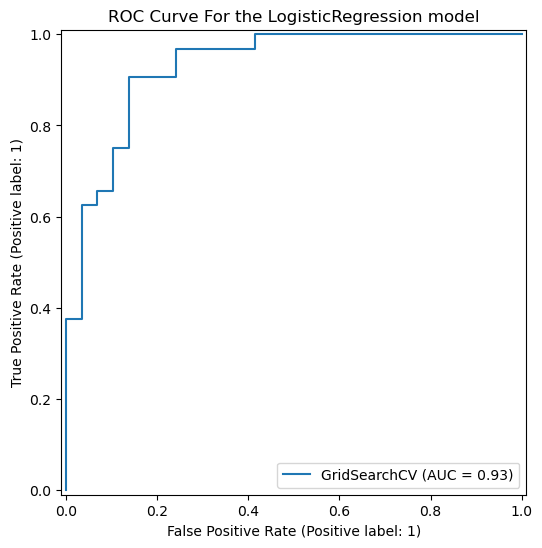

In [97]:
RocCurveDisplay.from_estimator(estimator=logR_gridS,
                              X=x_test,
                              y=y_test);
plt.title("ROC Curve For the LogisticRegression model")
plt.show()

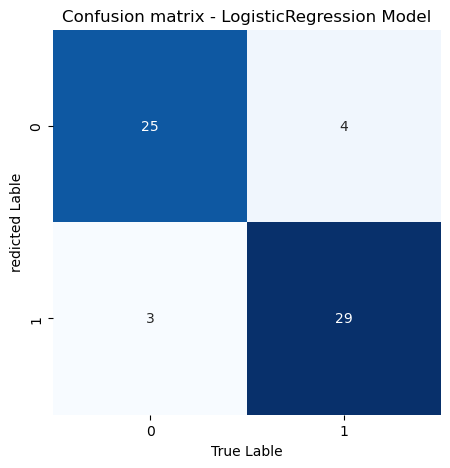

In [106]:
## Confusion matrix 

def plot_confusion_mat(y_test, y_pred):
    """
    this method prints the Confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,
                    cbar=False,
                    cmap="Blues")
    plt.xlabel("True Lable")
    plt.ylabel("redicted Lable")
    plt.title("Confusion matrix - LogisticRegression Model")
    plt.show()

plot_confusion_mat(y_test, y_pred)


In [107]:
## Clasification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [109]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'max_iter': 220, 'C': 0.23357214690901212}

In [112]:
clf = LogisticRegression(C=0.23357214690901212,
                        solver='liblinear',
                        max_iter=220)

In [114]:
# Cross-Vallided Accuracy score : 
np.random.seed(42)
cv_accuracy = cross_val_score(clf,
                             x,
                             y,
                             cv = 5,
                             scoring="accuracy")

print(f"Cross validated accuracy : {np.mean(cv_accuracy)*100:.2f} %")

Cross validated accuracy : 84.80 %


In [116]:
## Cross-Validated Recall score
np.random.seed(42)
cv_recall = cross_val_score(clf,
                           x,
                           y,
                           cv=5,
                           scoring="recall")

print(f"Cross validated recall : {np.mean(cv_recall)*100:.2f} %")

Cross validated recall : 92.73 %


In [117]:
## Cross-Validated F1 score
np.random.seed(42)
cv_f1 = cross_val_score(clf,
                           x,
                           y,
                           cv=5,
                           scoring="f1")

print(f"Cross validated f1 : {np.mean(cv_f1)*100:.2f} %")

Cross validated f1 : 87.05 %


In [118]:
## Cross-Validated F1 score
np.random.seed(42)
cv_pre = cross_val_score(clf,
                           x,
                           y,
                           cv=5,
                           scoring="precision")

print(f"Cross validated Precision : {np.mean(cv_pre)*100:.2f} %")

Cross validated Precision : 82.16 %


In [129]:
cv_matrics = pd.DataFrame({"Accuracy" : cv_accuracy.mean()*100,
                          "Precision" : cv_pre.mean()*100,
                          "Recall" : cv_recall.mean()*100,
                          "F1" : cv_f1.mean()*100,
                          "Accuracy" : cv_accuracy.mean()*100},
                         index=[0])

cv_matrics

,Accuracy,Precision,Recall,F1
0,84.797814,82.15873,92.727273,87.054035


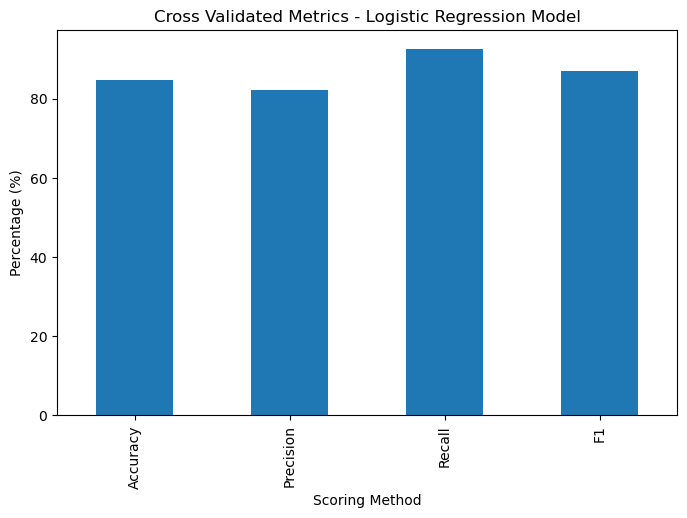

In [131]:
cv_matrics.T.plot.bar(title = "Cross Validated Metrics - Logistic Regression Model", legend = False, figsize = (8,5));

plt.xlabel("Scoring Method")
plt.ylabel("Percentage (%)")
plt.show()

## Feature importance 

In [132]:
clf.fit(x_train, y_train);

In [133]:
clf.coef_

array([[ 0.00369922, -0.90424098,  0.67472823, -0.0116134 , -0.00170364,
         0.04787687,  0.33490208,  0.02472938, -0.63120414, -0.57590996,
         0.47095166, -0.65165344, -0.69984217]])

In [134]:
features_dic = dict(zip(data.columns, list(clf.coef_[0])))
features_dic

{'age': 0.003699223396114675,
 'sex': -0.9042409779785583,
 'cp': 0.6747282348693419,
 'trestbps': -0.011613398123390507,
 'chol': -0.0017036431858934173,
 'fbs': 0.0478768694057663,
 'restecg': 0.33490207838133623,
 'thalach': 0.024729380915946855,
 'exang': -0.6312041363430085,
 'oldpeak': -0.5759099636629296,
 'slope': 0.47095166489539353,
 'ca': -0.6516534354909507,
 'thal': -0.6998421698316164}

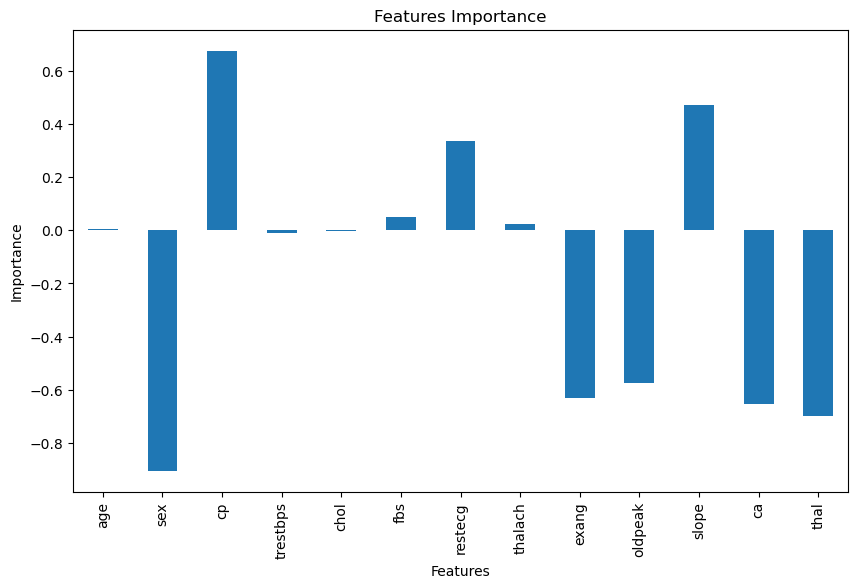

In [147]:
features_DF = pd.DataFrame(features_dic, index=[0])

features_DF.T.plot.bar(title="Features Importance", legend=False, figsize=(10,6));
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

## Notes

Features with 0 Importance are not Affect to the Target and, if you identify the this kind of features you can remove to imporve the process